# Assignment 3
## Deep Learning Technologies
### Shruti Badrinarayanan - 016768141

[Github Link](https://github.com/shruti-badri-14/Deep-Learning-Homework/tree/main/Assignment%203)

# Step 1

Create your own custom dataset featuring 3 custom categories of at least 100 images each

I am using 3 categories from the "CIFAR-10" dataset, which is a popular dataset for image classification tasks. The categories are: 'airplane', 'automobile', 'bird'.

In [ ]:
import tensorflow as tf

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Select only the samples belonging to the categories: airplane (class 0), automobile (class 1), and bird (class 2)
selected_classes = [0, 1, 2]

# Filter training set
train_mask = tf.reduce_any(tf.equal(train_labels, selected_classes), axis=1)
train_images = train_images[train_mask][:1500]
train_labels = train_labels[train_mask][:1500]

# Filter test set
test_mask = tf.reduce_any(tf.equal(test_labels, selected_classes), axis=1)
test_images = test_images[test_mask][:300]
test_labels = test_labels[test_mask][:300]

# CIFAR-10 has 10 classes, let's define the class names
class_names = ['airplane', 'automobile', 'bird']

# Display some information about the filtered dataset
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)
print("Number of classes:", len(class_names))

Training images shape: (1500, 32, 32, 3)
Training labels shape: (1500, 1)
Test images shape: (300, 32, 32, 3)
Test labels shape: (300, 1)
Number of classes: 3


# Step 2
Split this data between 80% training and 20% test



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)

Training images shape: (1200, 32, 32, 3)
Training labels shape: (1200, 1)
Validation images shape: (300, 32, 32, 3)
Validation labels shape: (300, 1)


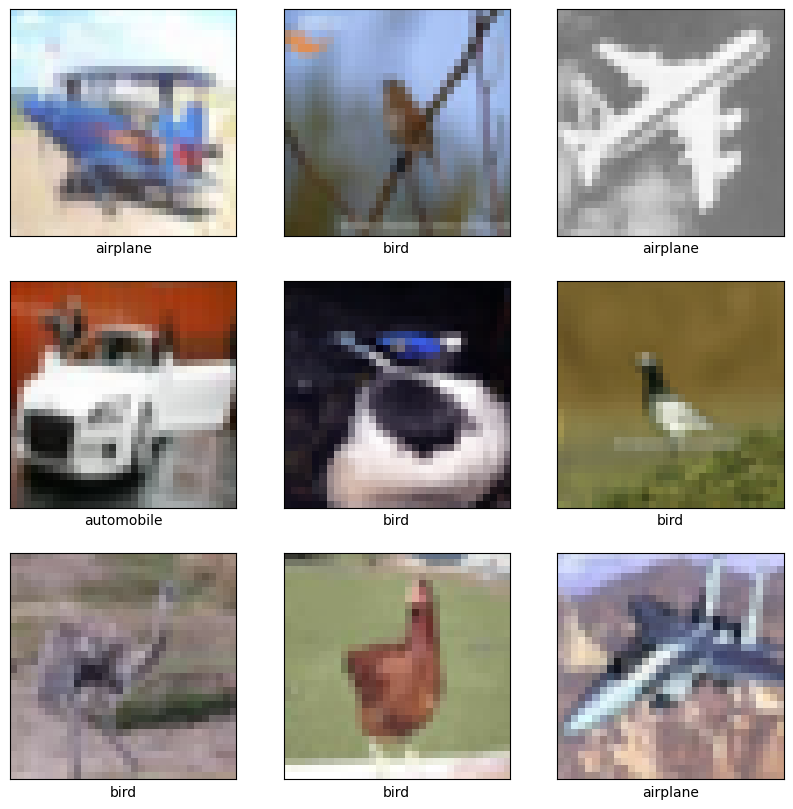

In [ ]:
import matplotlib.pyplot as plt

# Define class names
class_names = ['airplane', 'automobile', 'bird']

# Function to display a grid of images
def plot_images(images, labels, class_names, rows=3, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        # Plot image
        ax.imshow(images[i])
        # Show true label
        true_label = class_names[labels[i][0]]
        ax.set_xlabel(true_label)
        # Remove ticks
        ax.set_xticks([]), ax.set_yticks([])
    plt.show()

# Plot sample images
plot_images(train_images, train_labels, class_names)

# Step 3
Preprocess the data as you see fit

Normalise the data

In [ ]:
from tensorflow.keras import layers
import numpy as np

# Create Rescaling layer to normalize pixel values
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

# Normalize train_images
train_images_normalized = normalization_layer(train_images)
# Normalize val_images
val_images_normalized = normalization_layer(val_images)
# Normalize test_images
test_images_normalized = normalization_layer(test_images)

# Verify the normalization
print("Train images - Min:", np.min(train_images_normalized), "Max:", np.max(train_images_normalized))
print("Validation images - Min:", np.min(val_images_normalized), "Max:", np.max(val_images_normalized))
print("Test images - Min:", np.min(test_images_normalized), "Max:", np.max(test_images_normalized))

Train images - Min: 0.0 Max: 1.0
Validation images - Min: 0.0 Max: 1.0
Test images - Min: 0.0 Max: 1.0


# Step 4
Create a Convolutional Neural Network model to learn about your training set

In [ ]:
from tensorflow.keras import layers, models

# Define the input shape
img_height, img_width = 32, 32
num_classes = 3

# Resize the input images to match the expected input shape of the model
train_images_resized = tf.image.resize(train_images, (img_height, img_width))
val_images_resized = tf.image.resize(val_images, (img_height, img_width))
test_images_resized = tf.image.resize(test_images, (img_height, img_width))

# Create the model
model = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    # Add more layers here (e.g., convolutional layers, pooling layers, etc.)
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_391 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_392 (Conv2D)         (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_393 (Conv2D)         (None, 4, 4, 64)         

# Step 5
Make predictions on the test data and compare them to the expected categories

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
38/38 [==============================] - 2s 10ms/step - loss: 0.9929 - accuracy: 0.5125 - val_loss: 0.8745 - val_accuracy: 0.6367
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 0.7414 - accuracy: 0.6992 - val_loss: 0.7350 - val_accuracy: 0.6967
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.6097 - accuracy: 0.7542 - val_loss: 0.7040 - val_accuracy: 0.7200
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.5464 - accuracy: 0.7808 - val_loss: 0.7007 - val_accuracy: 0.7300
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.4878 - accuracy: 0.8075 - val_loss: 0.6736 - val_accuracy: 0.7133
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.4863 - accuracy: 0.7883 - val_loss: 0.6495 - val_accuracy: 0.7233
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 0.4419 - accuracy: 0.8217 - val_loss: 0.6147 - val_accuracy: 0.7533
Epoch 8/10
38/38 [=

# Step 6
Use GoogleNet (InceptionNet) and add a Linear Layer on top of it

In [ ]:
# Import InceptionV3 and necessary layers
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load InceptionV3 model pre-trained on ImageNet dataset
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional base
base_model.trainable = False

# Add a custom top layer for classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Combine the base model with custom top layers
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_394 (Conv2D)         (None, 74, 74, 32)           864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_376 (B  (None, 74, 74, 32)           96        ['conv2d_394[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_376 (Activation  (None, 74, 74, 32)           0         ['batch_normalization_37

# Step 7
Train the GoogleNet model and compare the accuracy with the first model:

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
import numpy as np

# Resize images to (150, 150)
def resize_images(images):
    resized_images = []
    for image in images:
        resized_image = array_to_img(image).resize((150, 150))
        resized_images.append(img_to_array(resized_image))
    return np.array(resized_images)

# Resize training, validation, and test images
train_images_resized = resize_images(train_images)
val_images_resized = resize_images(val_images)
test_images_resized = resize_images(test_images)

# Train the model
history = model.fit(train_images_resized, train_labels, epochs=10, validation_data=(val_images_resized, val_labels))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images_resized, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
38/38 [==============================] - 9s 108ms/step - loss: 33.1121 - accuracy: 0.4333 - val_loss: 14.9592 - val_accuracy: 0.4067
Epoch 2/10
38/38 [==============================] - 2s 41ms/step - loss: 8.6819 - accuracy: 0.5142 - val_loss: 4.4749 - val_accuracy: 0.6067
Epoch 3/10
38/38 [==============================] - 2s 43ms/step - loss: 7.1728 - accuracy: 0.5467 - val_loss: 8.6031 - val_accuracy: 0.5333
Epoch 4/10
38/38 [==============================] - 2s 41ms/step - loss: 6.3819 - accuracy: 0.6067 - val_loss: 5.3186 - val_accuracy: 0.5967
Epoch 5/10
38/38 [==============================] - 2s 41ms/step - loss: 3.6972 - accuracy: 0.6417 - val_loss: 3.8666 - val_accuracy: 0.6200
Epoch 6/10
38/38 [==============================] - 2s 41ms/step - loss: 2.4641 - accuracy: 0.6908 - val_loss: 3.7207 - val_accuracy: 0.5833
Epoch 7/10
38/38 [==============================] - 2s 51ms/step - loss: 3.4440 - accuracy: 0.6408 - val_loss: 5.4161 - val_accuracy: 0.6033
Epoch 8/10

### Comparing the accuracies of the two models:

1. Custom CNN Model:
  - Test accuracy: 81.33%
2. Google InceptionNet Model:
  - Test accuracy: 65.66%

Based on the above results, the Custom CNN model outperforms the Google InceptionNet model. The Custom CNN achieves higher accuracies on all three categories, indicating better generalization to unseen data.

### Takeaways:

1. The CIFAR-10 dataset may not be the best fit for the InceptionNet architecture, which was originally designed for more complex datasets like ImageNet.
2. The InceptionNet model might require more fine-tuning or adjustments to work well with the CIFAR-10 dataset.
3. Limited training data or insufficient training epochs could also contribute to the lower performance of the InceptionNet model.
4. In contrast, this custom CNN model is specifically designed and trained for the CIFAR-10 dataset, which could explain its better performance on this task. Also, the custom CNN model might have more suitable architecture and hyperparameters for this particular dataset.